# Introduction to Project

This is credit modeling project. Fit and predict one's income based on various indicators

## Importing the dataset
[Dataset Here](https://datahub.io/machine-learning/adult#resource-adult)
[About the Dataset](https://archive.ics.uci.edu/ml/datasets/Adult)
Please store in the same working director as your jupyter notebook.


In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
# seaborn custom paramenters for uniformity
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib as mpl

## Columns/Features of Dataset

In [3]:
# import the file path and import csv to dataframe
file = 'adult.csv'
df = pd.read_csv(file)

# get the column names and count
columns = df.columns; columns_list= columns.tolist()
num_columns = columns.nunique(); print("Number of columns:", num_columns, "\n", columns_list)

Number of columns: 15 
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native-country', 'class']


In [4]:
# preview the data fields
preview = df.head(1); print(preview, "\n")

   age  workclass  fnlwgt  education  education-num marital-status  \
0    2  State-gov   77516  Bachelors             13  Never-married   

     occupation   relationship   race   sex  capitalgain  capitalloss  \
0  Adm-clerical  Not-in-family  White  Male            1            0   

   hoursperweek native-country  class  
0             2  United-States  <=50K   



## Dataset Metadata

In [5]:
# the data type of each of the columns
variable_types = df.dtypes.to_dict()
print(variable_types)

{'age': dtype('int64'), 'workclass': dtype('O'), 'fnlwgt': dtype('int64'), 'education': dtype('O'), 'education-num': dtype('int64'), 'marital-status': dtype('O'), 'occupation': dtype('O'), 'relationship': dtype('O'), 'race': dtype('O'), 'sex': dtype('O'), 'capitalgain': dtype('int64'), 'capitalloss': dtype('int64'), 'hoursperweek': dtype('int64'), 'native-country': dtype('O'), 'class': dtype('O')}


## Column Overviews

In [6]:
for x in columns_list:
    print(x) # print column name
    variable_categories = df[x].unique(); print(variable_categories, "\n")

age
[2 3 1 0 4] 

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977] 

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Ot

# Inspecting the outcome: "class"
String variables will have to be mapped into a numeric character using the <code>df.replace([old list],[new list])</code>

In [7]:
df2 = df # created a copy of df
df2.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K


#### Sector and Pay:
The people in the dataset make less than $50k a year with a majority or responses working in the private sector. Upon closer inspection of "workclass", there is a category of never worked

<AxesSubplot:xlabel='class', ylabel='count'>

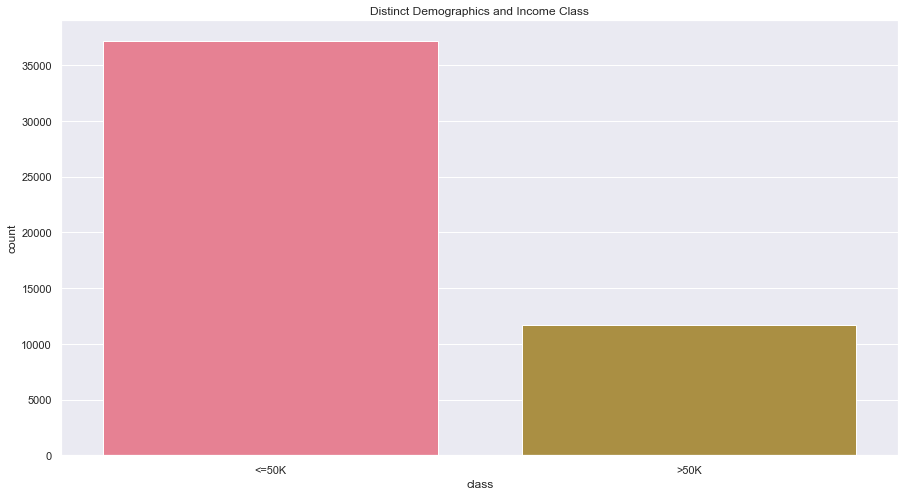

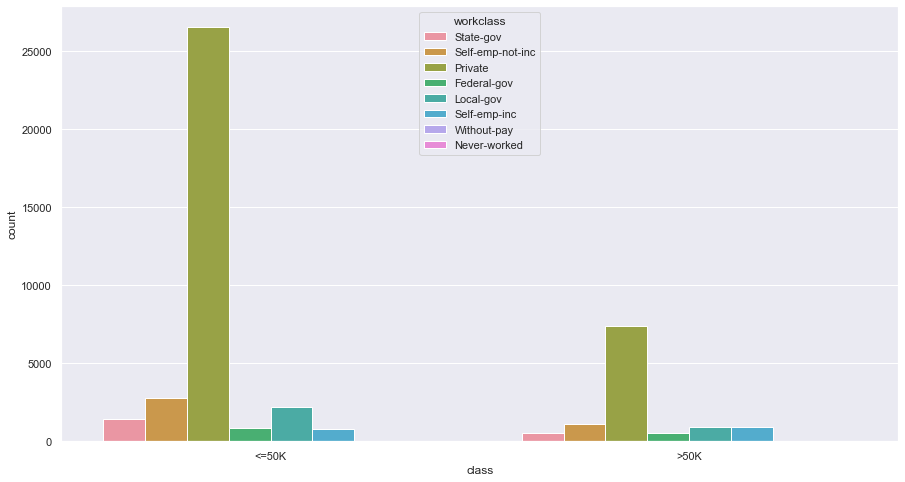

In [8]:
# look at the frequency of each class in y
rcParams['figure.figsize'] = 15,8
sns.set_theme(style = "darkgrid", palette= "husl")
plt.title("Distinct Demographics and Income Class")
sns.countplot(x="class", data = df2)
plt.figure(2)
sns.countplot(x="class", data = df2, hue = "workclass")

#### Education and Income

<AxesSubplot:xlabel='class', ylabel='count'>

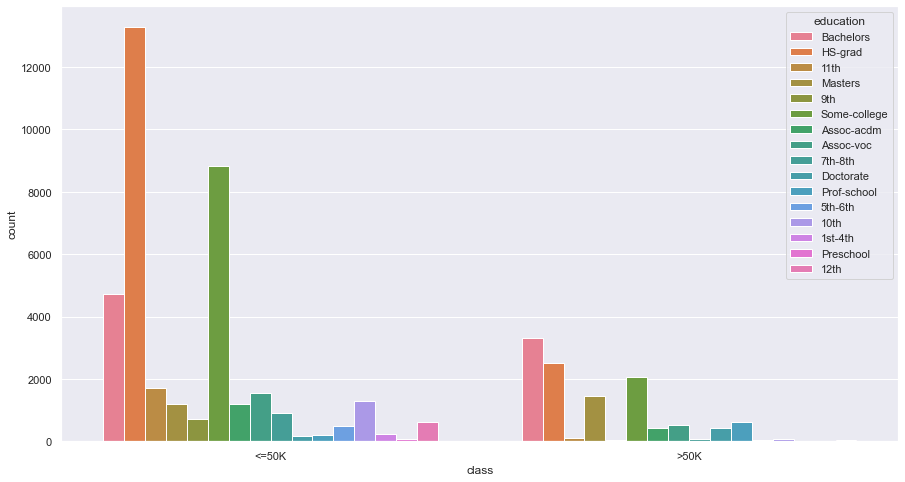

In [9]:
rcParams['figure.figsize'] = 15,8
sns.set_theme(style = "darkgrid")
sns.countplot(x="class", data = df2, hue = "education", palette= "husl")

#### Discriminatory Factors: Sex, Race, and Native Country

<AxesSubplot:xlabel='class', ylabel='count'>

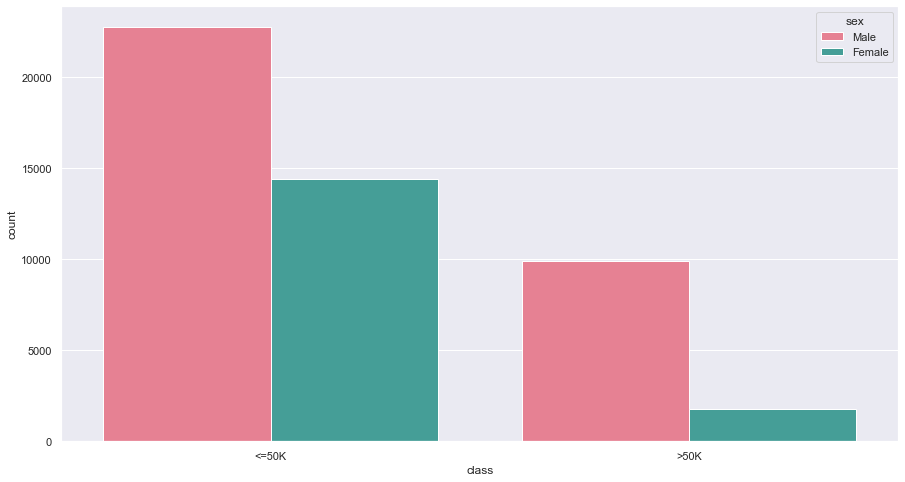

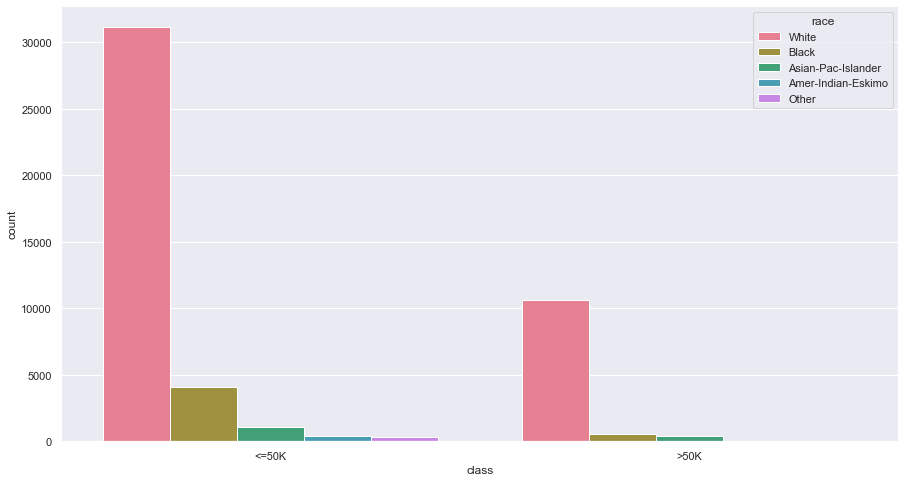

In [10]:
rcParams['figure.figsize'] = 15,8
sns.set_theme(style = "darkgrid")
sns.countplot(x="class", data = df2, hue = "sex", palette= "husl")
plt.figure(2)
sns.countplot(x="class", data = df2, hue = "race", palette= "husl")
# native country

## Siyayi Block

<AxesSubplot:xlabel='class', ylabel='count'>

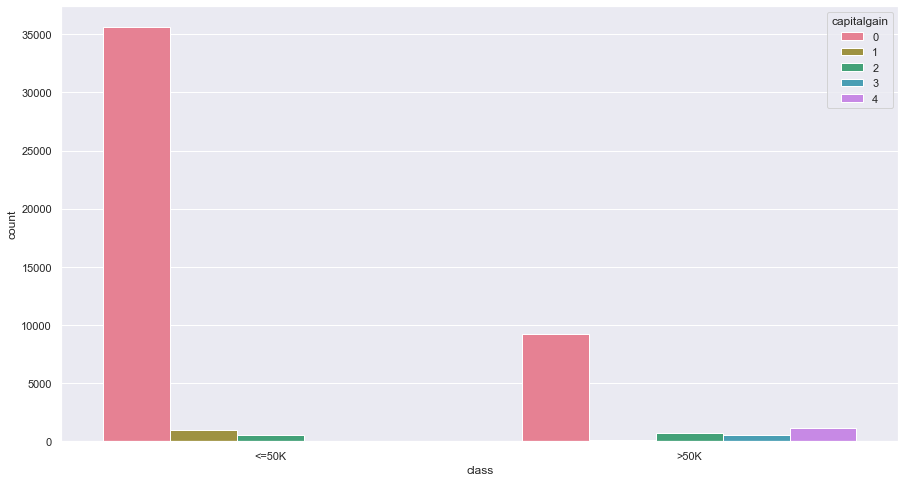

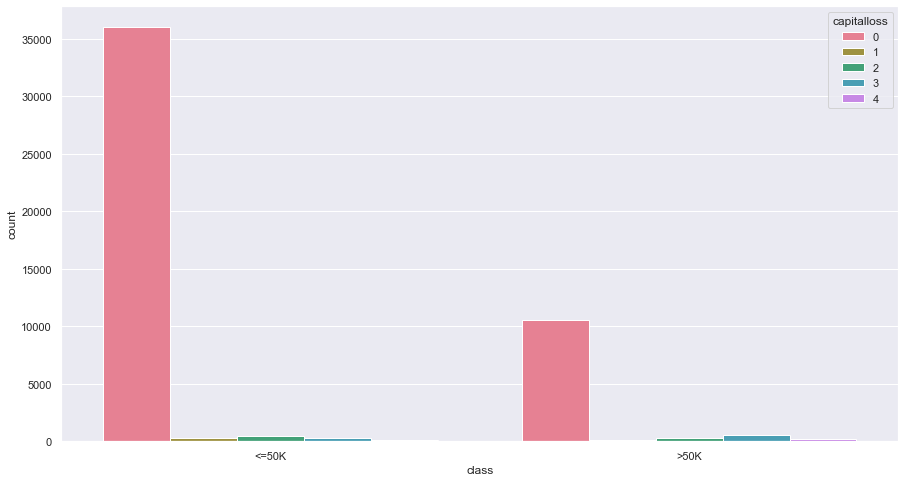

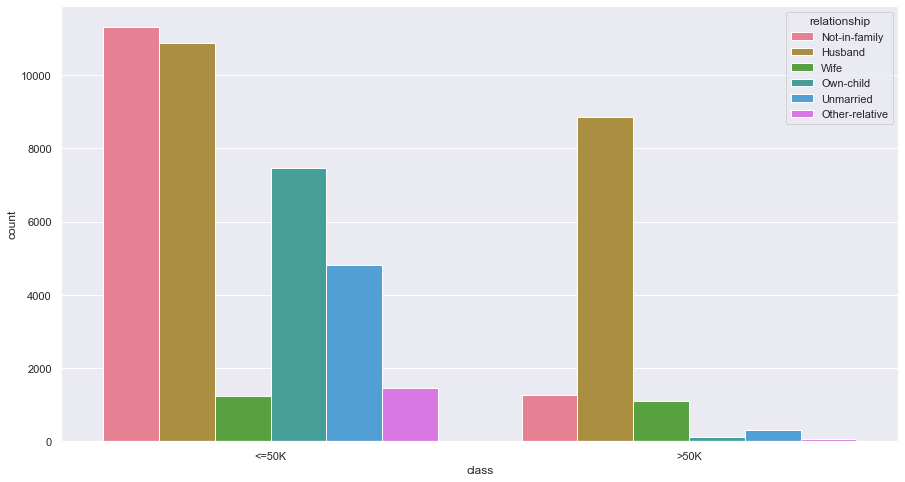

In [11]:
plt.figure(5)
sns.countplot(x="class", data = df2, hue = "capitalgain", palette= "husl")
plt.figure(6)
sns.countplot(x="class", data = df2, hue = "capitalloss", palette= "husl")
plt.figure(7)
sns.countplot(x="class", data = df2, hue = "relationship", palette= "husl")

<AxesSubplot:xlabel='class', ylabel='count'>

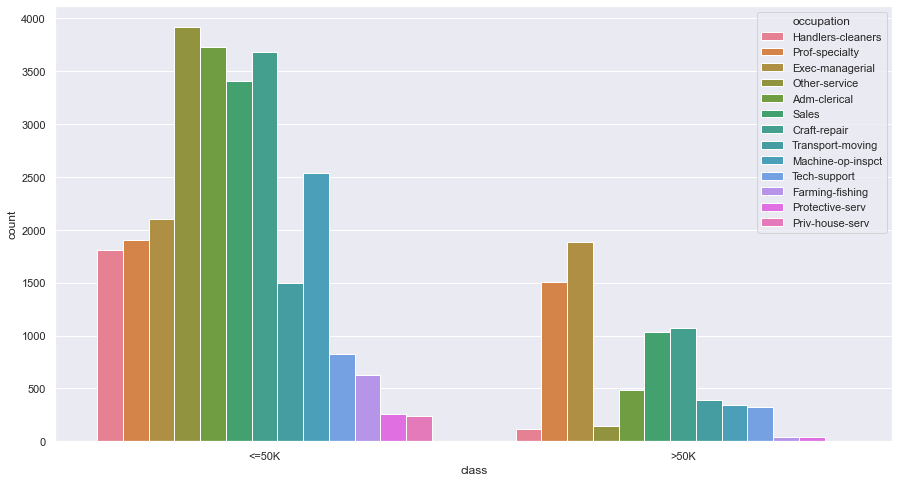

In [12]:
# create a new dataframe
private_workclass = df2[df['workclass'] == 'Private'] # syntax which is logically equivalent to use a dataframe, selecting a column from data frame and filtering the value
private_workclass.head()
sns.countplot(x="class", data = private_workclass, hue = "occupation", palette= "husl")

## Will's Block

<AxesSubplot:xlabel='class', ylabel='count'>

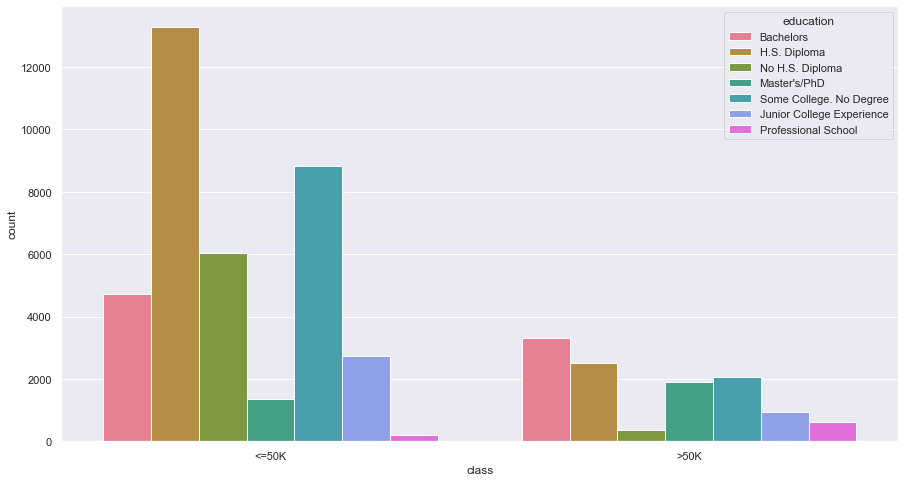

In [13]:
#making lists of different education categories
did_not_grad_hs = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th',
                  '11th','12th']
no_uni_grad = ['HS-grad']
some_college = ['Some-college']
assoc_grad = ['Assoc-acdm','Assoc-voc']
advanced_degree = ['Masters', 'Doctorate']
prof_school = ['Prof-school']

#recoding education data
df3 = df2.replace(to_replace = did_not_grad_hs, value = 'No H.S. Diploma')
df3 = df3.replace(to_replace = no_uni_grad, value = "H.S. Diploma")
df3 = df3.replace(to_replace = assoc_grad, value = "Junior College Experience")
df3 = df3.replace(to_replace = advanced_degree, value = "Master's/PhD")
df3 = df3.replace(to_replace = some_college, value = "Some College. No Degree")
df3 = df3.replace(to_replace = prof_school, value = "Professional School")


plt.figure(9)
sns.countplot(x = "class", data = df3, hue = 'education' , palette = 'husl')

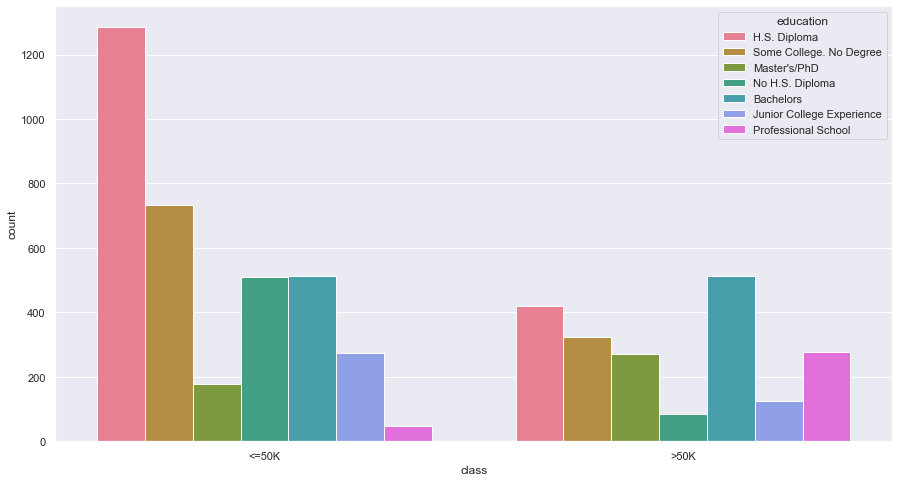

In [14]:
selfemployed_inc = df3[df3['workclass'] == 'Self-emp-inc']
selfemployed_notinc = df3[df3['workclass'] == 'Self-emp-not-inc']
selfemployed_total = selfemployed_inc.append(selfemployed_notinc)

sns.countplot(x = "class", data = selfemployed_total, hue = "education", palette = 'husl');
#combining all selfemployed and visualizing their education

In [15]:
#Putting marital status into tighter groups
df3 = df3.replace(['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent'],'Currently Married')
df3 = df3.replace(['Divorced','Separated','Widowed'], "Married Prior")
df3 = df3.replace('Never-married', 'Has not married')

In [16]:
#getting rid of education number and final weight columns
df3 = df3.drop(['education-num','fnlwgt'],axis=1)

In [22]:
df3['class'] = df3['class'].replace('<=50K', 0)
df3['class'] = df3['class'].replace('>50K', 1)

<AxesSubplot:xlabel='class', ylabel='count'>

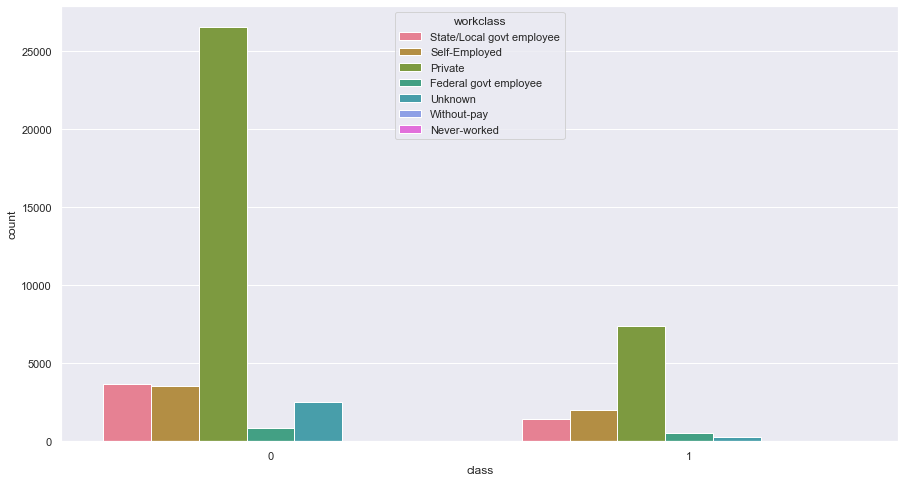

In [23]:
#Combining workclass data
df3 = df3.replace(['State-gov','Local-gov'], 'State/Local govt employee')
df3 = df3.replace('Federal-gov', 'Federal govt employee')
df3 = df3.replace(['Self-emp-inc','Self-emp-not-inc'], 'Self-Employed')

workclass_drop = df3.loc[(df3['workclass'] == 'Without-pay')]
workclass_drop = workclass_drop.append(df3.loc[(df3['workclass'] == "Never-worked")])


df3['workclass'].fillna('Unknown', inplace = True)
df3['workclass'].value_counts()
#Want to figure out how to drop without pay and never worked
sns.countplot(x = 'class', hue = 'workclass', data = df3, palette = 'husl')

## Data Cleaning and Combining

### Capital Gains and Capitals Loss vs Class

### Private Workforce: Employed vs Self Employed

### Education Categories:
* Did not graduate high school
* Some college
* Associate Voca and Associate Adcm
* Bachelors
* Masters and Doctors
* Professional School

In [24]:
df3['native-country'].fillna('Not Given', inplace = True)
df3['occupation'].fillna('Unknown', inplace = True)

In [25]:
df3.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
class             0
dtype: int64

In [27]:
columns1 = df3.columns; columns_list1= columns1.tolist()
num_columns1 = columns1.nunique()

for x in columns_list1:
    print(x) # print column name
    variable_categories1 = df3[x].unique(); print(variable_categories1, "\n")

age
[2 3 1 0 4] 

workclass
['State/Local govt employee' 'Self-Employed' 'Private'
 'Federal govt employee' 'Unknown' 'Without-pay' 'Never-worked'] 

education
['Bachelors' 'H.S. Diploma' 'No H.S. Diploma' "Master's/PhD"
 'Some College. No Degree' 'Junior College Experience'
 'Professional School'] 

marital-status
['Has not married' 'Currently Married' 'Married Prior'] 

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex
['Male' 'Female'] 

capitalgain
[1 0 4 2 3] 

capitalloss
[0 3 1 2 4] 

hoursperweek
[2 0 3 4 1] 

native-country
['United-States' 'Cuba' 'Jamaica' 'India' 'Not Given' 'Mexico' 'South'
 'Puerto-R

###Model Building

In [28]:
X = df3.drop(["class"], axis =1)
y = df3["class"]

In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [31]:
df4 = df3.copy()
df4 = df4.apply(LabelEncoder().fit_transform)
df4.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,4,0,1,0,1,4,1,1,0,2,39,0
1,3,3,0,0,3,0,4,1,0,0,0,39,0
2,2,2,1,2,5,1,4,1,0,0,2,39,0
3,3,2,4,0,5,0,2,1,0,0,2,39,0
4,1,2,0,0,9,5,2,0,0,0,2,4,0


In [42]:
ss = StandardScaler().fit(df4.drop('class', axis=1))

In [43]:
X = ss.transform(df4.drop('class', axis=1))
y = df3['class']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 40)

Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)

print("Accuracy on the training data: {:,.3f}".format(lr.score(X_train,y_train)))
print("Accuracy on the testing data: {:,.3f}".format(lr.score(X_test,y_test)))

Accuracy on the training data: 0.810
Accuracy on the testing data: 0.803


Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train,y_train)
prediction1 = model1.predict(X_test)

print("Accuracy on the training data: {:,.3f}".format(rfc.score(X_train,y_train)))
print("Accuracy on the testing data: {:,.3f}".format(rfc.score(X_test,y_test)))

Accuracy on the training data: 0.920
Accuracy on the testing data: 0.832


In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [48]:
print(confusion_matrix(y_test, prediction1))

[[10164   944]
 [ 1511  2034]]


In [49]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     11108
           1       0.68      0.57      0.62      3545

    accuracy                           0.83     14653
   macro avg       0.78      0.74      0.76     14653
weighted avg       0.83      0.83      0.83     14653

